In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Phase 1 — Data Exploration


In [3]:
# Load dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', 
                 header=None, 
                 names=['id', 'diagnosis', 'radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst'])
# Show the first five rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#finding shape of dataset 
print("Cancer data set dimensions : {}".format(df.shape))

#source of code - https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3 

Cancer data set dimensions : (569, 32)


In [6]:
#checking the null values 
df.isnull().sum()
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Data Visulazation 

In [7]:
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')

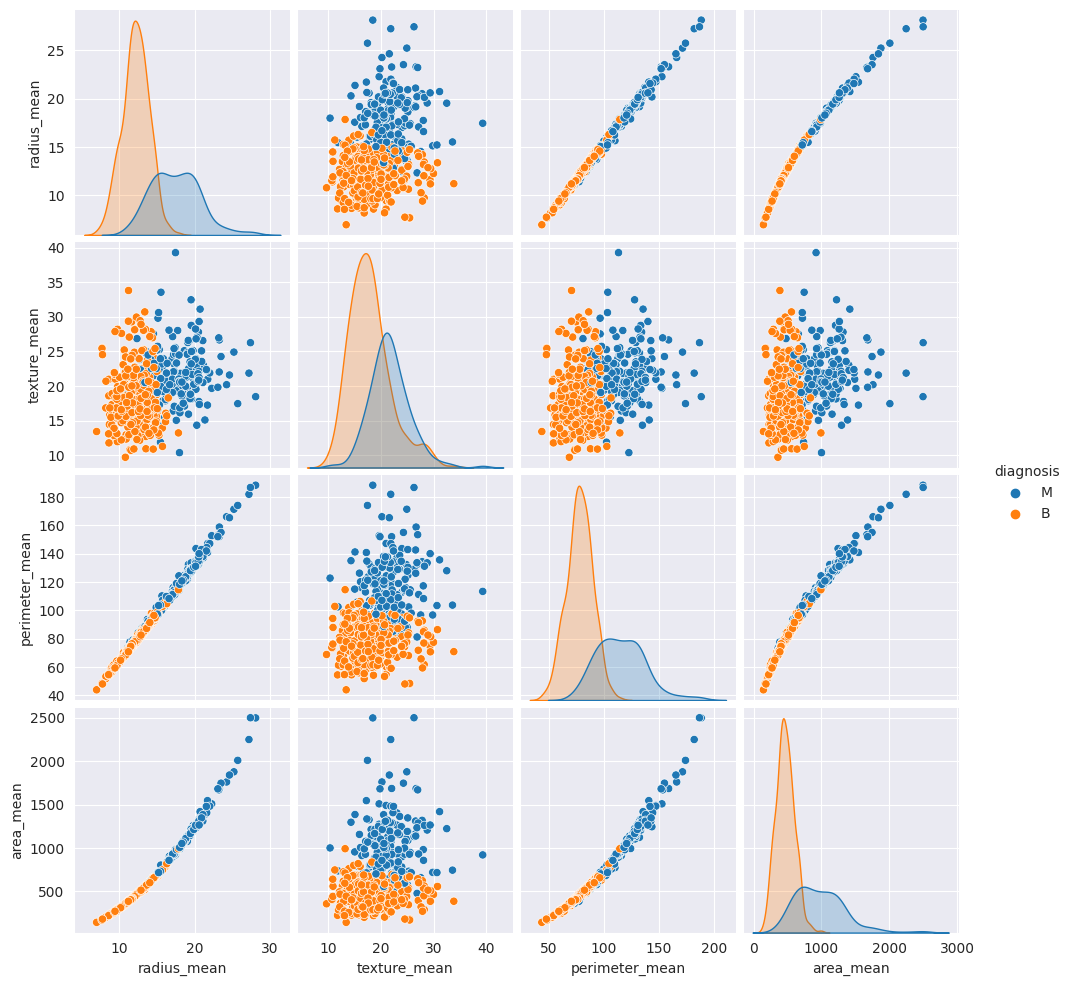

In [14]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(df[cols], hue="diagnosis")
plt.show()

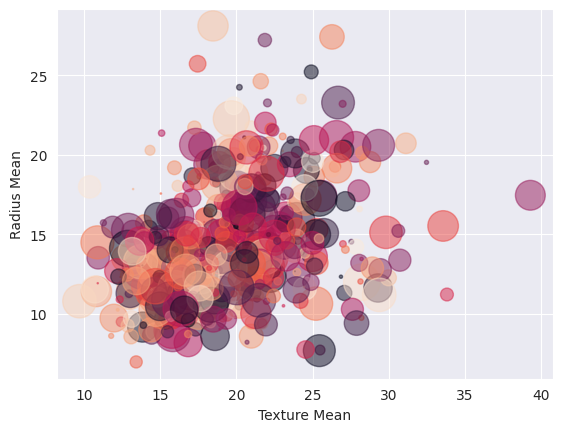

In [15]:
size = len(df['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("Texture Mean")
plt.ylabel("Radius Mean") 
plt.scatter(df['texture_mean'], df['radius_mean'], s=area, c=colors, alpha=0.5);

## Phase 2 — Categorical Data

In [19]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [20]:
labelencoder_Y = LabelEncoder()
df.diagnosis = labelencoder_Y.fit_transform(df.diagnosis)
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


### Correlation Graph

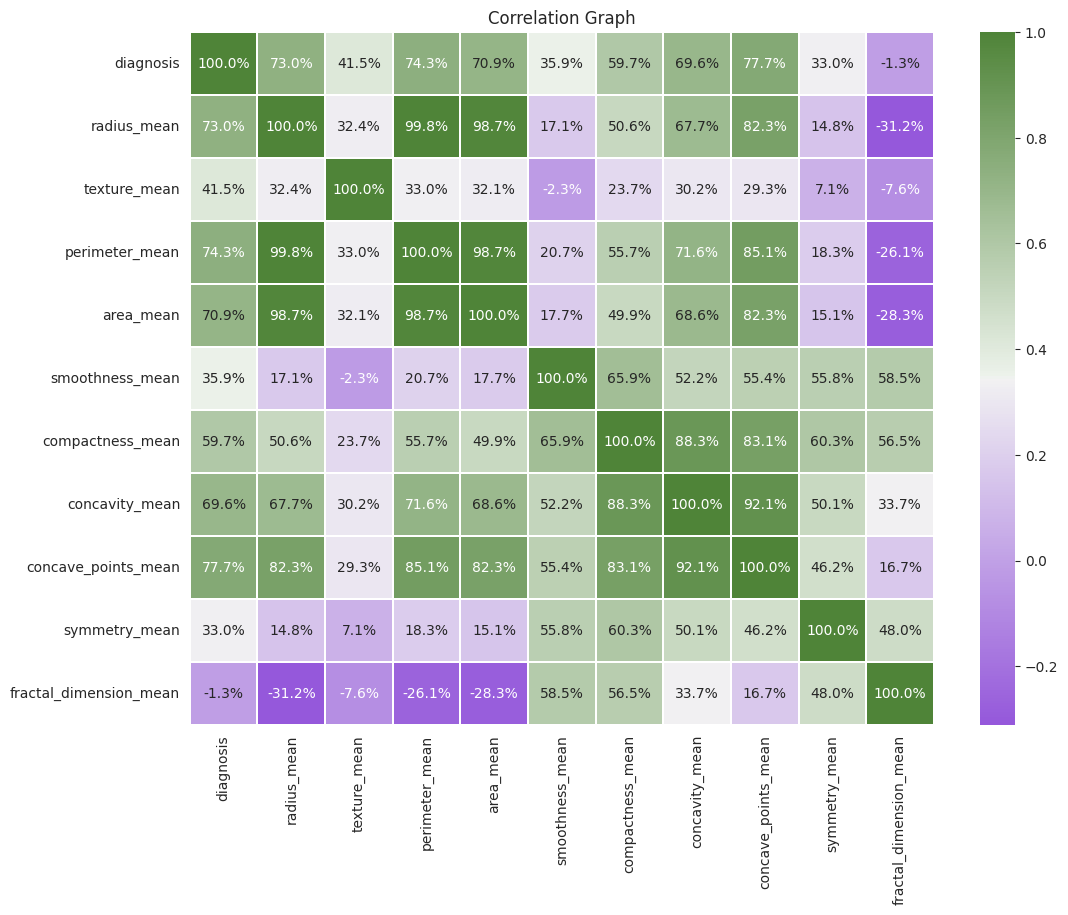

In [23]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(df[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

## Phase 3 - Feature Scaling

In [28]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave_points_mean']
targeted_feature = 'diagnosis'
X = df[prediction_feature]
y = df.diagnosis

In [29]:
#splitting the dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train)

     radius_mean  perimeter_mean  area_mean  symmetry_mean  compactness_mean  \
68         9.029           58.79      250.5         0.2111           0.14130   
181       21.090          142.70     1311.0         0.2395           0.28320   
63         9.173           59.20      260.9         0.2341           0.08751   
248       10.650           68.01      347.0         0.1897           0.07234   
60        10.170           64.55      311.9         0.2743           0.08061   
..           ...             ...        ...            ...               ...   
71         8.888           58.79      244.0         0.1902           0.15310   
106       11.640           75.17      412.5         0.1801           0.10170   
270       14.290           90.30      632.6         0.1508           0.02675   
435       13.980           91.12      599.5         0.1669           0.11330   
102       12.180           77.22      458.7         0.1739           0.04038   

     concave_points_mean  
68          

In [31]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Phase 4 — Model Selection

**SVM Classifier**

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
# Create an SVM classifier
svm = SVC()

# Fit the model on the training data
svm.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = svm.predict(X_test)

In [34]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[68  3]
 [ 7 36]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.92      0.84      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



•	**Precision**: Precision is the model's ability to correctly forecast positive samples. A lower false positive rate is indicated by a greater precision number. The precision for class 0 is 0.91, which means that 91% of the projected positive cases (class 0) are right. The precision for class 1 is 0.92, meaning that 92% of the predicted affirmative cases (class 1) are correct.

•	**Recall**: Recall, also known as sensitivity or true positive rate, assesses the model's ability to properly detect positive samples. The recall for class 0 is 0.96, which means that 96 percent of the real affirmative cases (class 0) are accurately identified. The recall for class 1 is 0.84, suggesting that 84 percent of the actual affirmative cases (class 1) are accurately identified.

•**	F1-score**: The harmonic mean of precision and recall is the F1-score. It provides a fair assessment of the model's correctness. The F1-score for class 0 is 0.93, and the F1-score for class 1 is 0.88.

•	**Support**: The number of samples in each class is indicated by the support.

•	**Accuracy**: The accuracy of the model's predictions represents their overall correctness. The accuracy in this scenario is 0.91, meaning that the model correctly predicts the class for 91% of the samples in the test set.

•	**Macro Avg**: The macro average computes the average metrics over both classes, giving each class equal weight. Precision, recall, and F1-score are all 0.91 on average.

•	**Weighted Avg**: The weighted average computes the average metrics while taking into account the number of samples in each class. The average weighted precision, recall, and F1-score are all 0.91.



**Random Forest Classifier**

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[68  3]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114




## **Reference list**

Goel, V. (2018). Building a Simple Machine Learning Model on Breast Cancer Data. [online] Medium. Available at: https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3.

Sukani, V. (2022). 🦀 Breast Cancer Prediction Using Machine Learning. [online] kaggle.com. Available at: https://www.kaggle.com/code/vikasukani/breast-cancer-prediction-using-machine-learning [Accessed 6 Jun. 2023].